<a href="https://colab.research.google.com/github/Batovs/MAP2110-2021-Modelagem-Matematica/blob/main/Projeto%202/Brilho%20de%20V%C3%AAnus.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import math
from math import cos as cos
from math import pi as pi
from math import sqrt as sqrt
import numpy as np

In [ ]:
r = 10.81e7
R = 14.95e7

In [ ]:
def p_d (d,r,R): #p em função da distancia
  num = 2*r*d+d**2+r**2-R**2
  den = 4*r*d
  p = num/den
  return p

In [ ]:
def p_t (t,r,R): #p em função de teta
  num = (r-R*(cos(t)))
  den = sqrt(r**2+R**2-(2*r*R*(cos(t))))
  p = 0.5*(1+(num/den))
  return p

In [ ]:
def BrilhoVenus (ko,p,d):
  b = ko*(p/(d**2))
  return b

In [ ]:
def BrilhoVenus_d (k,d,r,R): #Brilho de Vênus em Função da Distância
  num = 2*r*d+d**2+r**2-R**2
  den = d**3
  b_d = k*num/den
  
  return b_d

In [ ]:
def Delta_Theta (t,r,R): 

  from math import cos as cos
  from math import sqrt as sqrt
  
  delta = sqrt(r**2+R**2-2*r*R*cos(t))
  return delta

In [ ]:
import math
from math import sqrt as sqrt

print(r,R)
print(Delta_Theta(0.39,r,R))
print (math.acos((4*r**2+2*R**2-4*r*sqrt(r**2+3*R**2))/(-2*r*R)))
print (math.cos(math.pi))
print(sqrt(r**2+R**2-2*r*math.cos(1.39)))
t = np.arange(0,pi,0.001)
len (t)

108100000.0 149500000.0
64350927.407442324
0.39051383332757045
-1.0
184488102.49206975


3142

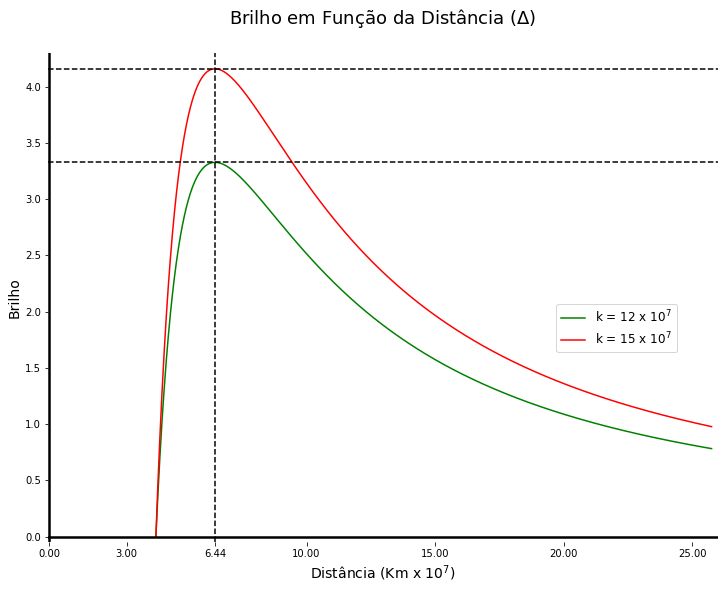

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

r = 10.81e7
R = 14.95e7
k1 = 12e7
k2 = 15e7
BriV_d1 = [] #vetor para os valores de brilho em função da distância 
BriV_d2 = []

#vetor de valores de distância entre [R-r,R+r] com 10000 pontos
d = np.arange((R-r),(R+r),21620)
#vetor Brilho(d)
for i in d:
  BriV_d1 = np.append(BriV_d1, BrilhoVenus_d (k1,i,r,R)) #k = 12e7

for i in d:
  BriV_d2 = np.append(BriV_d2, BrilhoVenus_d (k2,i,r,R)) #k = 15e7

plt.figure(figsize=(12,9))
plt.plot(d/10e6,BriV_d1,'g-',label='k = 12 x $10^7$')
plt.plot(d/10e6,BriV_d2,'r-',label='k = 15 x $10^7$ ')

#Valor máximo de brilho
agmax = BriV_d2.argmax()
dbmax = d[agmax] #64403680.0 km

#Melhoramentos do gráfico
ax = plt.gca()
plt.title ('Brilho em Função da Distância ($\\Delta$)\n',fontsize=18)
plt.xlabel('Distância (Km x $10^7$)',fontsize=14)
plt.ylabel('Brilho',fontsize=14)
ax.ticklabel_format(style='sci')
ax.set_xticks([0,3,6.44,10,15,20,25],minor=False)
#ax.xaxis.grid(True, which='minor')
ax.axvline(6.44, linestyle='--', color='k')
#ax.set_yticks([2.77,4.16], minor=True)
#ax.yaxis.grid(True, which='minor')
ax.axhline(BriV_d1[agmax],linestyle='--',color='k')
ax.axhline(BriV_d2[agmax],linestyle='--',color='k')
ax.axhline(0,lw=2.5,color='k')
ax.axvline(0,lw=2.5,color='k')
plt.axis([-0.05, 26, -0.05, 4.3])
plt.legend(bbox_to_anchor=(0.75, 0.5),fontsize=12)
# remove the frame of the chart
for spine in plt.gca().spines.values():
  spine.set_visible(False) 

plt.savefig('Brilho_Distancia.png')

In [ ]:
#Valor máximo de brilho
agmax = BriV_d2.argmax()
dbmax = d[agmax] #64403680.0 km
print(dbmax)

64403680.0


In [ ]:
pt = p_t((pi/2),r,R)
d = 6.44e7
pd = p_d(d,r,R)
print(BrilhoVenus(12,pd,d))
print(BrilhoVenus_d(3/r,d,r,R))

7.695231090867751e-16
7.695231090867751e-16


In [ ]:
p_d(6.43e7,r,R)

0.2651305671409026

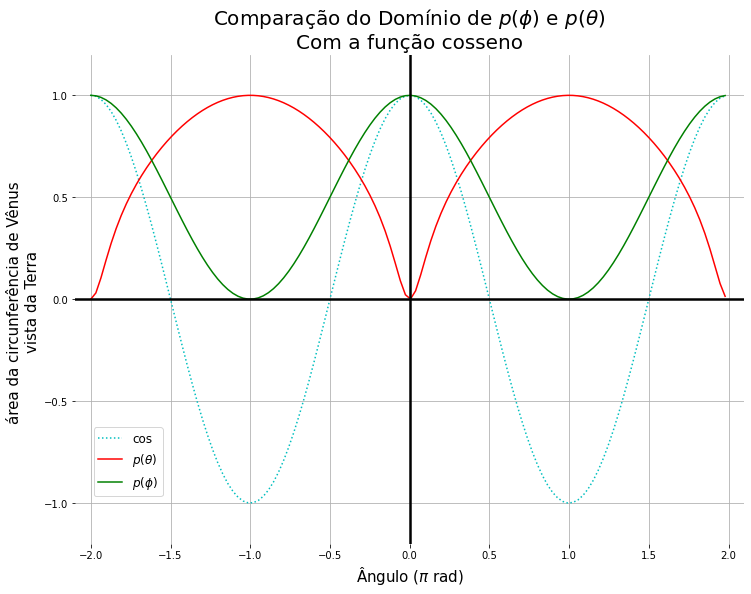

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from math import pi as pi

x = np.arange(-2*pi,2*pi,0.1)
y = np.cos(x)
plt.figure(figsize=(12,9))

plt.plot(x/pi,y, 'c:',label='cos')

pt = []
for i in x:
  pt = np.append(pt,p_t(i,r,R))
plt.plot(x/pi,pt, 'r-',label='$p(\\theta)$')

z = 0.5*(1+np.cos(x))
plt.plot(x/pi,z,'g-',label='$p(\phi)$')  

#Melhoramentos do Grafico
plt.title('Comparação do Domínio de $p(\phi)$ e $p(\\theta)$\nCom a função cosseno', fontsize=20)
plt.xlabel('Ângulo ($\pi$ rad)',fontsize=15)
plt.ylabel('área da circunferência de Vênus \nvista da Terra ',fontsize=15)
plt.axis([-2.1, 2.1, -1.2, 1.2])
ax = plt.gca()
ax.grid(True)
ax.axhline(0, color='black', lw=2.5)
ax.axvline(0, color='black', lw=2.5)
plt.legend(loc='best',bbox_to_anchor=(0.14, 0.25),fontsize=12)
# remove the frame of the chart
for spine in plt.gca().spines.values():
  spine.set_visible(False) 

plt.savefig('Dominio.png')

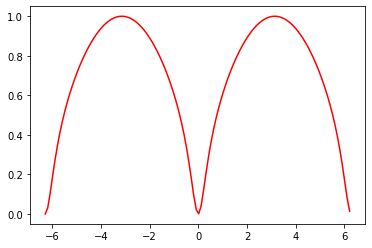

In [ ]:
plt.figure()
# plot the linear data and the exponential data
plt.plot(x,pt, 'r-')

In [ ]:
d= np.arange((R-r),(R+r),216200) 
pd=[]
for i in d:
  pd = np.append(pd,p_d(i,r,R))
len (d)


1000

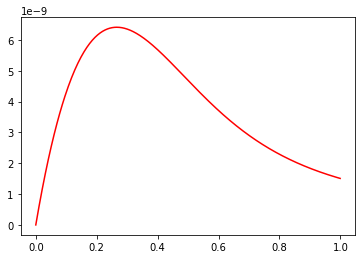

In [ ]:
plt.figure()
# plot the linear data and the exponential data
#plt.plot(d,pd, '-')  
brilho_d = []
for i in d:
  brilho_d = np.append(brilho_d,BrilhoVenus(10e7,p_d(i,r,R),i))
len (brilho_d)
plt.plot(pd,brilho_d,'r-')




In [ ]:
-2*r+(sqrt(r**2+3*R**2))

64400000.0

0.391


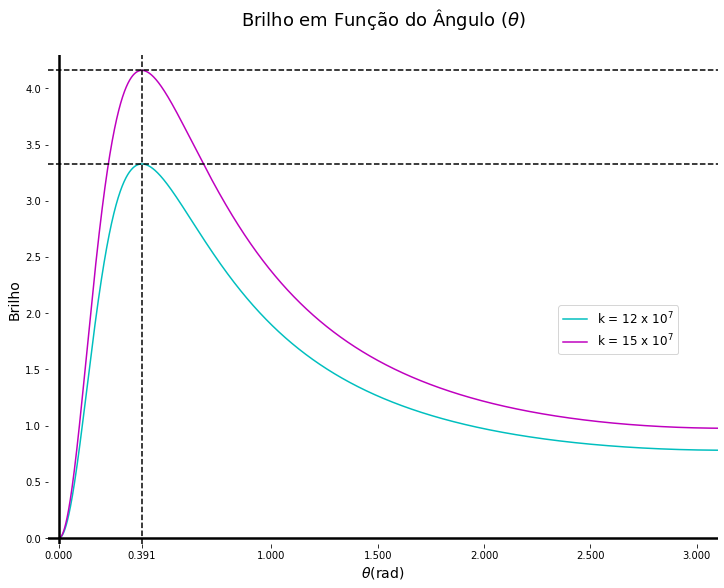

In [ ]:
#Grafico em função de theta
import numpy as np
import matplotlib.pyplot as plt

r = 10.81e7
R = 14.95e7
k1 = 12e7
k2 = 15e7
BriV_t1 = [] #vetor para os valores de brilho em função de theta 
BriV_t2 = []

#vetor de valores de distância entre [0,pi] com 3000 pontos aproximadamente
t = np.arange(0,pi,0.001)

#vetor Brilho(t)
#usando a mesma função do Brilho(d), mas usando a função delta_theta, para 
#ter delta em função de theta
for i in t:
  BriV_t1 = np.append(BriV_t1, BrilhoVenus_d (k1,Delta_Theta(i,r,R),r,R)) #k = 12e7

for i in t:
  BriV_t2 = np.append(BriV_t2, BrilhoVenus_d (k2,Delta_Theta(i,r,R),r,R)) #k = 15e7

plt.figure(figsize=(12,9))
plt.plot(t,BriV_t1,'c-',label='k = 12 x $10^7$')
plt.plot(t,BriV_t2,'m-',label='k = 15 x $10^7$')

#Valor máximo de brilho
agmax = BriV_t2.argmax()
tbmax = t[agmax] #64403680.0 km
print (tbmax)

#Melhoramentos do gráfico
ax = plt.gca()
plt.title ('Brilho em Função do Ângulo ($\\theta$)\n',fontsize=18)
plt.xlabel('$\\theta$(rad)',fontsize=14)
plt.ylabel('Brilho',fontsize=14)
ax.set_xticks([0,tbmax,1,1.5,2.0,2.5,3],minor=False)
ax.axhline(BriV_t1[agmax],linestyle='--',color='k')
ax.axhline(BriV_t2[agmax],linestyle='--',color='k')
ax.axvline(tbmax,linestyle='--',color='k')
ax.axhline(0,lw=2.5,color='k')
ax.axvline(0,lw=2.5,color='k')
plt.axis([-0.05, 3.1, -0.05, 4.3])
plt.legend(bbox_to_anchor=(0.95, 0.5),fontsize=12)
# remove the frame of the chart
for spine in plt.gca().spines.values():
  spine.set_visible(False) 

plt.savefig('Brilho_Theta.png')

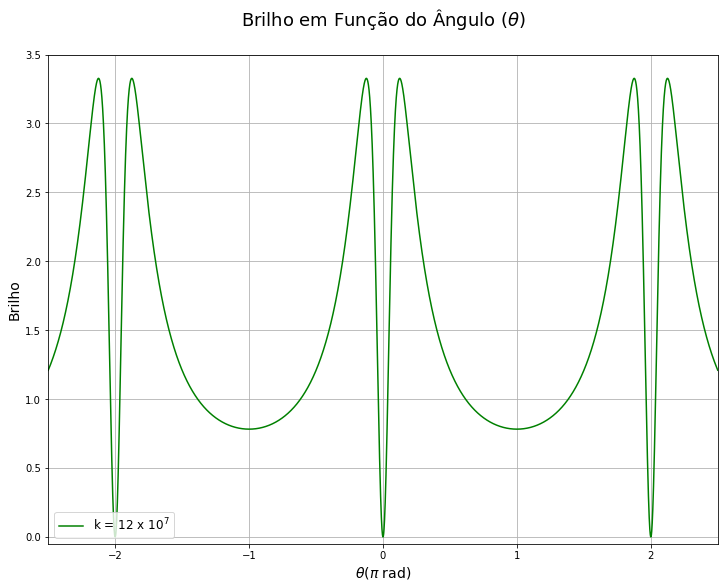

In [ ]:
#Grafico em função de theta com dominio em R
import numpy as np
import matplotlib.pyplot as plt
from math import pi as pi

r = 10.81e7
R = 14.95e7
k1 = 12e7

BriV_t1 = [] #vetor para os valores de brilho em função de theta 

#vetor de valores de distância entre [0,pi] com 3000 pontos aproximadamente
t = np.arange(-2.5*pi,2.5*pi,.001)

#vetor Brilho(t)
#usando a mesma função do Brilho(d), mas usando a função delta_theta, para 
#ter delta em função de theta
for i in t:
  BriV_t1 = np.append(BriV_t1, BrilhoVenus_d (k1,Delta_Theta(i,r,R),r,R)) #k = 12e7

plt.figure(figsize=(12,9))
plt.plot(t/pi,BriV_t1,'g-',label='k = 12 x $10^7$')



#Melhoramentos do gráfico
ax = plt.gca()
plt.title ('Brilho em Função do Ângulo ($\\theta$)\n',fontsize=18)
plt.xlabel('$\\theta$($\pi$ rad)',fontsize=14)
plt.ylabel('Brilho',fontsize=14)
plt.axis([-2.5, 2.5, -0.05, 3.5])
ax.grid(True)
plt.legend(fontsize=12)

plt.savefig('Brilho_Theta_R.png')